### Configurações

In [12]:
%pip install pandas
%pip install numpy
%pip install html5lib

%pip install requests  # Corrigido para 'requests'
%pip install lxml


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd
import requests

# URL da página com as tabelas
url = 'https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o'

# Baixar o conteúdo da página
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    tabelas = pd.read_html(response.text
                        #    , header=1
                           )  # Define a segunda linha como cabeçalho

    # Dicionário para armazenar os DataFrames
    dfs = {}

    # Criar um DataFrame para cada tabela e armazenar no dicionário
    for i, tabela in enumerate(tabelas):
        nome_df = f'df{i+1}'
        dfs[nome_df] = tabela
else:
    print(f"Erro ao acessar a página: {response.status_code}")

C:\Users\joth1\AppData\Local\Temp\ipykernel_76976\3282383733.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabelas = pd.read_html(response.text


In [14]:
# display(dfs['df2'])
df = dfs['df2'].copy()
df['Cidade'] = 'São Paulo'
df

,Unnamed: 0,Distrito,Pop. Total 2022,Pop. Urb. 2022,Cidade
0,1º,Grajaú,384873,382897,São Paulo
1,2º,Jardim Ângela,311432,311329,São Paulo
2,3º,Capão Redondo,270767,270767,São Paulo
3,4º,Sapopemba,266715,266715,São Paulo
4,5º,Sacomã,261436,261436,São Paulo
...,...,...,...,...,...
91,92º,Barra Funda,33436,33436,São Paulo
92,93º,Jaguara,24730,24730,São Paulo
93,94º,Sé,23832,23832,São Paulo
94,95º,Pari,17359,17359,São Paulo


In [15]:
# FONTE: https://www.imoveispro.com.br/blog/zonas-de-sp/

zona_central= [
    "Barra Funda", "Bela Vista", "Bom Retiro", "Brás", "Consolação", "Bras", "Liberdade", "Pari", "República", "Santa Cecília", "Sé"
]

zona_norte= [
        "Casa Verde", "Jaçanã", "Mandaqui", "Santana", "Tremembé", "Tucuruvi", "Vila Guilherme", "Vila Maria", "Vila Medeiros"
]

zona_leste = [
    "Água Rasa", "Aricanduva", "Artur Alvim", "Belém", "Cangaíba", "Carrão", "Cidade Líder", "Cidade Tiradentes", "Ermelino Matarazzo", 
    "Guaianases", "Iguatemi", "Itaim Paulista", "Itaquera", "Jardim Helena", "José Bonifácio", "Lajeado","Mooca", "Parque do Carmo", "Penha", 
    "Ponte Rasa", "São Lucas", "São Mateus", "São Miguel", "Sapopemba", "São Rafael", "Vila Matilde", "Vila Formosa", "Vila Prudente", "Tatuapé", "Vila Curuçá", "Vila Jacuí", "Itaim Bibi"
]

zona_sul=[
    "Cambuci", "Campo Belo", "Campo Grande", "Campo Limpo", "Capão Redondo", "Cidade Ademar", "Cidade Dutra", "Cursino", 
    "Grajaú", "Ipiranga", "Jabaquara", "Jardim Ângela", "Jardim Paulista", "Jardim São Luís", "Marsilac", "Moema", "Morumbi", 
    "Pedreira", "Parelheiros", "Sacomã", "Santo Amaro",
    "Saúde", "Socorro", "Vila Andrade", "Vila Mariana", "Vila Sônia"
]

zona_oeste=[
    "Alto de Pinheiros", "Anhanguera", "Brasilândia", "Butantã", "Cachoeirinha", "Freguesia do Ó", "Jaguaré", "Jaraguá", 'Jaguara',
    "Lapa", "Limão", "Perdizes", "Pinheiros", "Pirituba", "Raposo Tavares", "Rio Pequeno", "São Domingos", "Vila Leopoldina", "Perus"
]

# Validação para garantir que há 96 distritos no total
total_distritos = (
    len(zona_central) + len(zona_norte) + len(zona_leste) + len(zona_sul) + len(zona_oeste)
)
print(total_distritos)

df['ds_zona_sp'] = np.where(
        df['Distrito'].isin(zona_leste), 'Zona Leste'
        ,np.where(
            df['Distrito'].isin(zona_oeste), 'Zona Oeste'
            ,np.where(
            df['Distrito'].isin(zona_norte), 'Zona Norte'
            , np.where(
                df['Distrito'].isin(zona_sul), 'Zona Sul'
                ,np.where(df['Distrito'].isin(zona_central), 'Zona Central', 'Outros')
            )
            )
    )
)
display(df)


97


,Unnamed: 0,Distrito,Pop. Total 2022,Pop. Urb. 2022,Cidade,ds_zona_sp
0,1º,Grajaú,384873,382897,São Paulo,Zona Sul
1,2º,Jardim Ângela,311432,311329,São Paulo,Zona Sul
2,3º,Capão Redondo,270767,270767,São Paulo,Zona Sul
3,4º,Sapopemba,266715,266715,São Paulo,Zona Leste
4,5º,Sacomã,261436,261436,São Paulo,Zona Sul
...,...,...,...,...,...,...
91,92º,Barra Funda,33436,33436,São Paulo,Zona Central
92,93º,Jaguara,24730,24730,São Paulo,Zona Oeste
93,94º,Sé,23832,23832,São Paulo,Zona Central
94,95º,Pari,17359,17359,São Paulo,Zona Central


In [16]:
df_zona_leste = df.loc[df['ds_zona_sp'] == 'Zona Leste']
df_zona_leste

,Unnamed: 0,Distrito,Pop. Total 2022,Pop. Urb. 2022,Cidade,ds_zona_sp
3,4º,Sapopemba,266715,266715,São Paulo,Zona Leste
11,12º,Itaquera,210960,210960,São Paulo,Zona Leste
12,13º,Itaim Paulista,205295,205295,São Paulo,Zona Leste
14,15º,Cidade Tiradentes,194177,194160,São Paulo,Zona Leste
18,19º,Lajeado,164391,164391,São Paulo,Zona Leste
20,21º,São Mateus,155682,155682,São Paulo,Zona Leste
22,23º,Iguatemi,149700,149376,São Paulo,Zona Leste
23,24º,São Rafael,148145,148028,São Paulo,Zona Leste
25,26º,Cangaíba,141172,141172,São Paulo,Zona Leste
26,27º,Vila Curuçá,140673,140673,São Paulo,Zona Leste


In [17]:
# # fonte dos bairros que possuem terminal de onibus: https://www.sptrans.com.br/terminais

# distritos_metro = ['Itaquera', 'Tatuapé', 'Mooca', 'Vila Prudente', 'Penha', 'Brás', 'Liberdade']
# distritos_terminal_onibus = ['Itaquera', 'Tatuapé', 'São Rafael', 'Vila Prudente', 'Parque do Carmo', 'Carrão', 'Belém', 'Cidade Tiradentes', 'Penha']

# # Adicionando as colunas
# df_zona_leste['Possui Estação de Metrô'] = np.where(df_zona_leste['Distrito'].isin(distritos_metro), 'Sim', 'Não')
# df_zona_leste['Possui Terminal de Ônibus'] = np.where(df_zona_leste['Distrito'].isin(distritos_terminal_onibus), 'Sim', 'Não')

# display(df_zona_leste)

C:\Users\joth1\AppData\Local\Temp\ipykernel_76976\1939441723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zona_leste["populacao_em_k"] = df_zona_leste["Pop. Total 2022"] / 1000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sapopemba'),
  Text(1, 0, 'Itaquera'),
  Text(2, 0, 'Itaim Paulista'),
  Text(3, 0, 'Cidade Tiradentes'),
  Text(4, 0, 'Lajeado'),
  Text(5, 0, 'São Mateus'),
  Text(6, 0, 'Iguatemi'),
  Text(7, 0, 'São Rafael'),
  Text(8, 0, 'Cangaíba'),
  Text(9, 0, 'Vila Curuçá')])

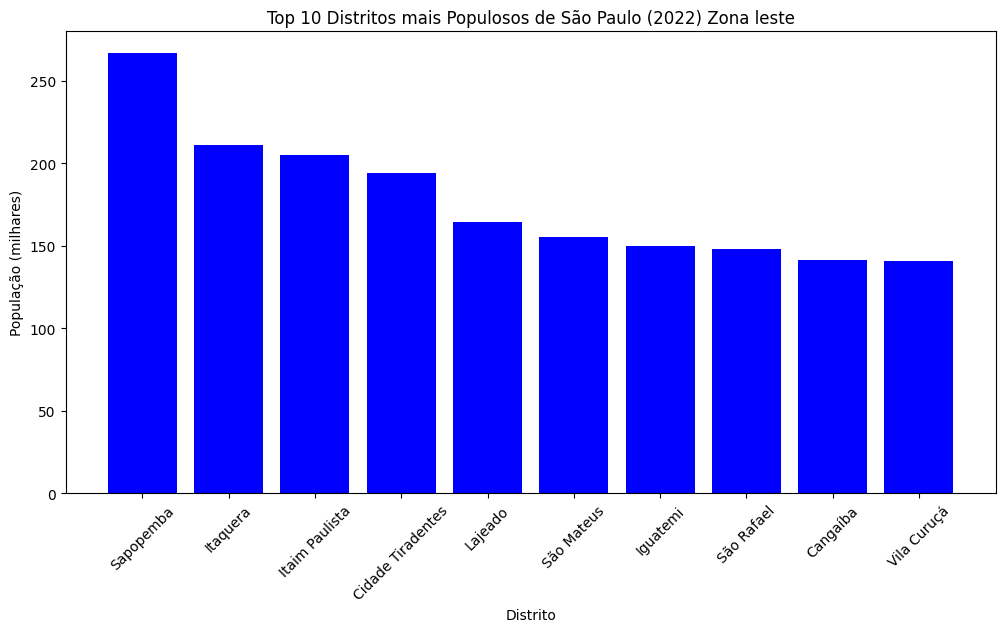

In [18]:
import matplotlib.pyplot as plt
df_zona_leste["populacao_em_k"] = df_zona_leste["Pop. Total 2022"] / 1000

# Selecionar os 10 bairros mais populosos
top_distritos = df_zona_leste.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_distritos["Distrito"], top_distritos["populacao_em_k"], color="blue")

# Adicionar rótulos e título
plt.xlabel("Distrito")
plt.ylabel("População (milhares)")
plt.title("Top 10 Distritos mais Populosos de São Paulo (2022) Zona leste")
plt.xticks(rotation=45)

### Inferência de Sexo e Idade

### Unidades de Saúde

In [19]:
df_estabelecimentos = pd.read_csv(r"C:\Users\joth1\Downloads\dados_estabelecimento_saude.csv", delimiter=";")
df_estabelecimentos = df_estabelecimentos.loc[df_estabelecimentos['REGIAO5']=='Leste']
df_estabelecimentos = df_estabelecimentos[['SUBPREF', 'TIPO', 'BAIRRO', 'ENDERECO', 'DISTRITO', 'LONG', 'LAT', 'SUBPREF']]


df_estabelecimentos.columns = df_estabelecimentos.columns.str.upper()  # Aplica em df_estabelecimentos
df_zona_leste.columns = df_zona_leste.columns.str.upper()  # Aplica em df (se necessário)

df_estabelecimentos.columns = df_estabelecimentos.columns.str.strip()  # Aplica em df_estabelecimentos
df_zona_leste.columns = df_zona_leste.columns.str.strip()  # Aplica em df (se necessário)

df_zona_leste['DISTRITO'] = df_zona_leste['DISTRITO'].str.upper()

# Cruzo base de população com ubs
df_final = pd.merge(df_zona_leste, df_estabelecimentos, left_on='DISTRITO', right_on='DISTRITO', how='left')
df_final

C:\Users\joth1\AppData\Local\Temp\ipykernel_76976\2911767130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zona_leste['DISTRITO'] = df_zona_leste['DISTRITO'].str.upper()


,UNNAMED: 0,DISTRITO,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,POPULACAO_EM_K,SUBPREF,TIPO,BAIRRO,ENDERECO,LONG,LAT,SUBPREF
0,4º,SAPOPEMBA,266715,266715,São Paulo,Zona Leste,266.715,VILA PRUDENTE,AMBULATORIO DE ESPECIALIDADES,JD. SAPOPEMBA,"JOAO LOPES DE LIMA,R,1151",-46492813.0,-23611267.0,VILA PRUDENTE
1,4º,SAPOPEMBA,266715,266715,São Paulo,Zona Leste,266.715,VILA PRUDENTE,ASSISTENCIA MEDICA AMBULATORIAL,V CARDOSO FRANCO,"BATISTA FERGUSIO,R,1016",-46509202.0,-23621178.0,VILA PRUDENTE
2,4º,SAPOPEMBA,266715,266715,São Paulo,Zona Leste,266.715,VILA PRUDENTE,ASSISTENCIA MEDICA AMBULATORIAL,V BANCARIA,"PEDRO DE CASTRO VELHO,R,523",-46515914.0,-23591570.0,VILA PRUDENTE
3,4º,SAPOPEMBA,266715,266715,São Paulo,Zona Leste,266.715,VILA PRUDENTE,ASSISTENCIA MEDICA AMBULATORIAL,JD. SAPOPEMBA,"JOAO LOPES DE LIMA,R,1151",-46492813.0,-23611267.0,VILA PRUDENTE
4,4º,SAPOPEMBA,266715,266715,São Paulo,Zona Leste,266.715,VILA PRUDENTE,CENTRO DE ATENCAO PSICOSSOCIAL INFANTIL,V CARDOSO FRANCO,"DAVID DE MELO LOPES,R,86",-46505087.0,-23618810.0,VILA PRUDENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,74º,PARQUE DO CARMO,74677,74677,São Paulo,Zona Leste,74.677,ITAQUERA,UNIDADE BASICA DE SAUDE,JD MARABA,"PONTA DE LUCENA,R,330",-46456902.0,-23561903.0,ITAQUERA
327,74º,PARQUE DO CARMO,74677,74677,São Paulo,Zona Leste,74.677,ITAQUERA,UNIDADE BASICA DE SAUDE,JD. HELIAN,"CARMEM CARDOSO BORDINI,R,184",-46455845.0,-23576490.0,ITAQUERA
328,74º,PARQUE DO CARMO,74677,74677,São Paulo,Zona Leste,74.677,ITAQUERA,UNIDADE BASICA DE SAUDE,JD. NOSSA SRA.DO CARMO,"VERISSIMO DA SILVA,R,135",-46479676.0,-23572403.0,ITAQUERA
329,74º,PARQUE DO CARMO,74677,74677,São Paulo,Zona Leste,74.677,ITAQUERA,UNIDADE BASICA DE SAUDE,ITAQUERA,"CACHOEIRA DA ILHA,R,355",-46459734.0,-23559060.0,ITAQUERA


### Algoritmo de Maps ()

In [20]:
from geopy.geocoders import Nominatim
import time

# Inicializando o geolocalizador
geolocator = Nominatim(user_agent="meu_aplicativo")

# Lista de bairros ou regiões de São Paulo
bairros = [
    "Centro", "Zona Leste", "Zona Oeste", "Zona Sul", "Zona Norte", "Itaquera", "Cidade Tiradentes",
    "Penha", "Vila Curuçá", "Sapopemba", "São Mateus", "Itaim Paulista", "São Rafael", "Lajeado",
    "São Miguel", "Parque do Carmo", "Artur Alvim", "Vila Prudente", "Vila Formosa", "Tatuapé", "Mooca"
]

# Função para buscar SAMU em diferentes bairros de São Paulo
def buscar_samus_em_sao_paulo(bairros):
    resultados = []
    for bairro in bairros:
        print(f"Buscando Saude em {bairro}...")
        try:
            localizacao = geolocator.geocode(f"Saude {bairro}")
            if localizacao:
                resultados.append({
                    'bairro': bairro,
                    'nome': localizacao.address,
                    'latitude': localizacao.latitude,
                    'longitude': localizacao.longitude
                })
            else:
                print(f"Não encontrado no bairro: {bairro}")
        except Exception as e:
            print(f"Erro ao buscar em {bairro}: {e}")
        
        # Para evitar excesso de requisições, vamos esperar um pouco entre as buscas
        time.sleep(1)
    
    return resultados

# Exemplo de busca
resultados_samu = buscar_samus_em_sao_paulo(bairros)

# Exibir os resultados
if resultados_samu:
    for resultado in resultados_samu:
        print(f"\nBairro: {resultado['bairro']}")
        print(f"Nome: {resultado['nome']}")
        print(f"Localização: {resultado['latitude']}, {resultado['longitude']}")
else:
    print("Nenhuma unidade do SAMU encontrada.")

Buscando Saude em Centro...
Buscando Saude em Zona Leste...
Buscando Saude em Zona Oeste...
Buscando Saude em Zona Sul...
Buscando Saude em Zona Norte...
Buscando Saude em Itaquera...
Buscando Saude em Cidade Tiradentes...
Buscando Saude em Penha...
Buscando Saude em Vila Curuçá...
Buscando Saude em Sapopemba...
Não encontrado no bairro: Sapopemba
Buscando Saude em São Mateus...
Buscando Saude em Itaim Paulista...
Buscando Saude em São Rafael...
Buscando Saude em Lajeado...
Buscando Saude em São Miguel...
Buscando Saude em Parque do Carmo...
Buscando Saude em Artur Alvim...
Buscando Saude em Vila Prudente...
Buscando Saude em Vila Formosa...
Buscando Saude em Tatuapé...
Buscando Saude em Mooca...

Bairro: Centro
Nome: Centro, Saúde da Chapada, Saúde, Região Geográfica Imediata de Jacobina, Região Geográfica Intermediária de Feira de Santana, Bahia, Região Nordeste, 44740-000, Brasil
Localização: -10.9413533, -40.4201768

Bairro: Zona Leste
Nome: UBS - Zona Leste, Avenida Presidente Tan